In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.interpolate import CubicSpline
from Blackbox import load_model, predict_point, predict_batch


[11-21 22:35:09][INFO] c:\Users\josue\OneDrive\Escritorio\Tareas_M\ProyectoIBM\[C] Blackbox S\Blackbox\blackbox.py
[11-21 22:35:09][INFO] 2025-11-21 22:35:09.994194


In [6]:
model = load_model()


Current working directory: c:\Users\josue\OneDrive\Escritorio\Tareas_M\ProyectoIBM\[C] Blackbox S


In [7]:
def find_interval(model, x1, x2_min=0, x2_max=0.4, samples=120):
    xs = np.linspace(x2_min, x2_max, samples)
    x1s = np.full_like(xs, x1)
    
    # Blackbox exige LISTAS
    vals = predict_batch(model, x1s.tolist(), xs.tolist())

    for i in range(len(vals)-1):
        if vals[i] != vals[i+1]:
            return xs[i], xs[i+1]
    
    return None


In [8]:
x1_values = np.linspace(0.1, 2, 60)
boundary_bisection = []

for x1 in x1_values:
    interval = find_interval(model, x1)
    
    if interval is None:
        boundary_bisection.append(np.nan)
    else:
        x2a, x2b = interval
        try:
            root = bisect(lambda x2: predict_point(model, x1, x2) - 0.5,
                          x2a, x2b, maxiter=80)
            boundary_bisection.append(root)
        except:
            boundary_bisection.append(np.nan)

boundary_bisection = np.array(boundary_bisection, dtype=float)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [9]:
mask = ~np.isnan(boundary_bisection)
x1_clean = x1_values[mask]
x2_clean = boundary_bisection[mask]


In [10]:
spline = CubicSpline(x1_clean, x2_clean)
x_fine = np.linspace(x1_clean.min(), x1_clean.max(), 400)
y_fine = spline(x_fine)


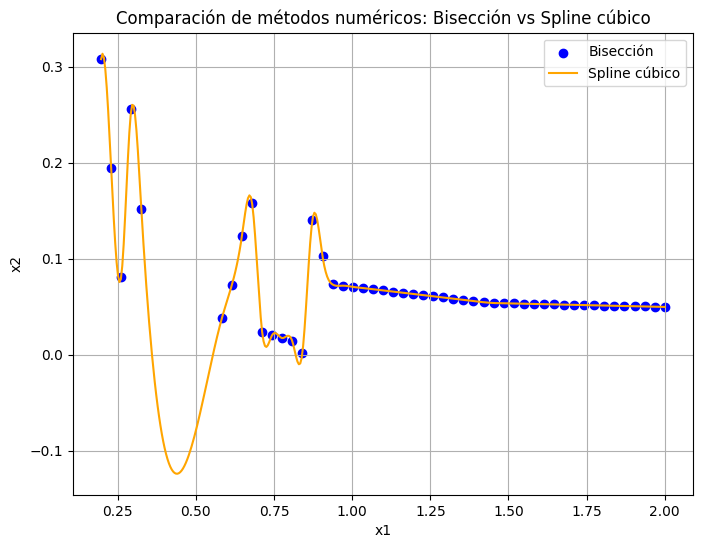

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x1_clean, x2_clean, label="Bisección", color='blue')
plt.plot(x_fine, y_fine, label="Spline cúbico", color='orange')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Comparación de métodos numéricos: Bisección vs Spline cúbico")
plt.legend()
plt.grid(True)
plt.show()


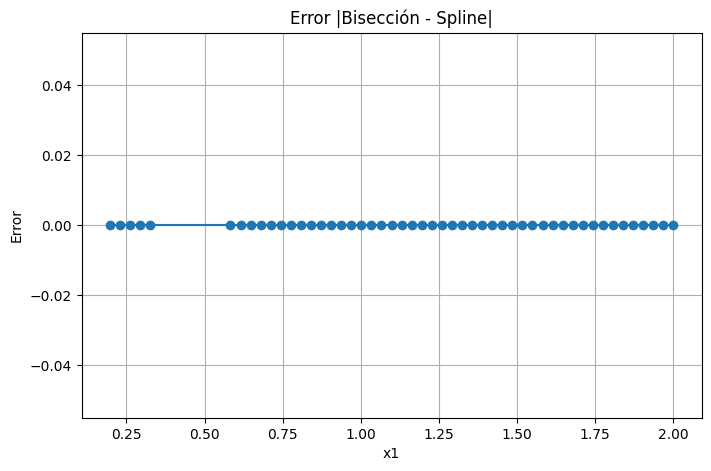

Error promedio: 0.0
Error máximo: 0.0


In [12]:
# Evaluar spline en los mismos puntos de bisección
y_spline_on_x1 = spline(x1_clean)

error = np.abs(y_spline_on_x1 - x2_clean)

plt.figure(figsize=(8,5))
plt.plot(x1_clean, error, marker='o')
plt.title("Error |Bisección - Spline|")
plt.xlabel("x1")
plt.ylabel("Error")
plt.grid(True)
plt.show()

print("Error promedio:", np.mean(error))
print("Error máximo:", np.max(error))


In [13]:
# Generamos puntos nuevos donde NO hicimos bisección
x_new = np.linspace(x1_clean.min(), x1_clean.max(), 200)

# Evaluamos el spline cúbico en estos puntos nuevos
y_spline_new = spline(x_new)

# Para comparar con bisección, hacemos una interpolación lineal simple
y_bisec_interp = np.interp(x_new, x1_clean, x2_clean)

# Calculamos el error
error_new = np.abs(y_spline_new - y_bisec_interp)


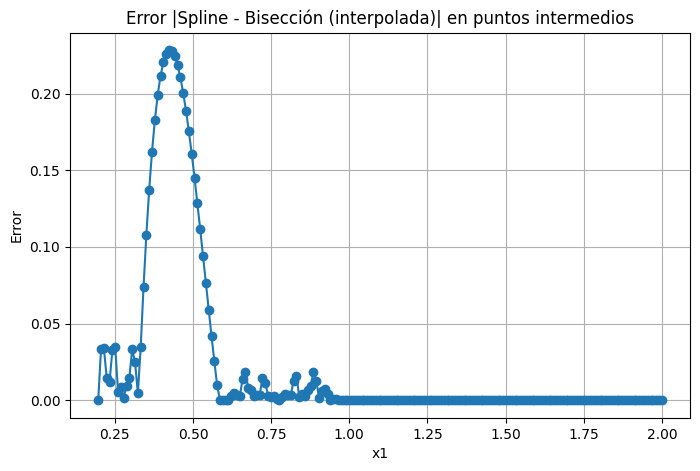

Error promedio: 0.022857853214478113
Error máximo: 0.22825138731760497


In [14]:
plt.figure(figsize=(8,5))
plt.plot(x_new, error_new, marker='o')
plt.title("Error |Spline - Bisección (interpolada)| en puntos intermedios")
plt.xlabel("x1")
plt.ylabel("Error")
plt.grid(True)
plt.show()

print("Error promedio:", np.mean(error_new))
print("Error máximo:", np.max(error_new))
